In [1]:
#load neccesary packages
using CSV
using DataFrames
using Plots
using Statistics
using StatsPlots
using RDatasets
using HypothesisTests
using StatsBase
using VegaLite
using Distances
using Distributed
addprocs(7)
@everywhere using Eirene   
@everywhere using SharedArrays


@everywhere push!(LOAD_PATH, $"E:functions/") 
@everywhere using cElegansFunctions
@everywhere using RCall


@everywhere R"library(TDA)"

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-10217028534412859812\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-13167766282558689781\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-10217028534412859812\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

[ Info: waiting for lock on pidfile at "C:\Users\alech\.jlassetregistry.lock"
[ Info: waiting for lock on pidfile at "C:\Users\alech\.jlassetregistry.lock"
[ Info: waiting for lock on pidfile at "C:\Users\alech\.jlassetregistry.lock"
[ Info: waiting for lock on pidfile at "C:\Users\alech\.jlassetregistry.lock"
[ Info: waiting for lock on pidfile at "C:\Users\alech\.jlassetregistry.lock"
[ Info: waiting for lock on pidfile at "C:\Users\alech\.jlassetregistry.lock"
┌ Warning: Error requiring WebSockets from WebIO:
│ LoadError: IOError: open: operation not permitted (EPERM)
│ Stacktrace:
│  [1] uv_error at .\libuv.jl:85 [inlined]
│  [2] open(::String, ::UInt16, ::UInt16) at .\filesystem.jl:81
│  [3] tryopen_exclusive(::String, ::UInt16) at C:\Users\alech\.julia\packages\Pidfile\q0iHJ\src\Pidfile.jl:152
│  [4] #open_exclusive#4(::UInt16, ::Int64, ::Int64, ::Function, ::String) at C:\Users\alech\.julia\packages\Pidfile\q0iHJ\src\Pidfile.jl:185
│  [5] #open_exclusive at .\none:0 [inlined]
│ 


R version 3.6.1 (2019-07-05) -- "Action of the Toes"
Copyright (C) 2019 The R Foundation for Statistical Computing
Platform: x86_64-w64-mingw32/x64 (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.


R version 3.6.1 (2019-07-05) -- "Action of the Toes"
Copyright (C) 2019 The R Foundation for Statistical Computing
Platform: x86_64-w64-mingw32/x64 (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

R is a collaborative projec

In [14]:
#load neccesary data files
positions = CSV.read("E://From Gene Expression File//279positions.csv", copycols = true, header = false)
positionsLabels = CSV.read("E://From Gene Expression File//279positionsLabels.csv", copycols = true, header = false)
birthTimes = CSV.read("E://From Gene Expression File//279birthTimes.csv", copycols = true, header = false)
birthTimesLabels = CSV.read("E://From Gene Expression File//279birthTimesLabels.csv", copycols = true, header = false)
connectionList = CSV.read("E://From Gene Expression File//NeuronConnect_corrected.csv", copycols = true, header = false)
labeledTypeList = CSV.read("E://From Gene Expression File//279labeledTypes.csv", copycols = true, header = false)

#done
println("done")

done


In [15]:
#process all the data into a single array sorted by birth time

#creates an array for positions with their labels
positionsMatrix = Array{Any, 2}(UndefInitializer(),279,3)

for i in 1:279
    positionsMatrix[i,1] = positionsLabels[1][i]
    positionsMatrix[i,2] = positions[i,1]
    positionsMatrix[i,3] = positions[i,2]
end

#creates an array for positions with their labels
birthTimesMatrix = Array{Any, 2}(UndefInitializer(),279,2)

for i in 1:279
    birthTimesMatrix[i,1] = birthTimesLabels[1][i]
    birthTimesMatrix[i,2] = birthTimes[1][i]
end

#creates an array for types with their labels
typeMatrix = Array{Any, 2}(UndefInitializer(), 279,2)

for i in 1:279
    typeMatrix[i,1] = labeledTypeList[1][i]
    typeMatrix[i,2] = labeledTypeList[2][i]
end



#sorts all the above matricies by neuron label to make them compatible
for i in 1:279
    movement = 0
    
    while i - movement > 1 && positionsMatrix[i - movement, 1] < positionsMatrix[i-movement - 1, 1]
        shadowCache = positionsMatrix[i - movement, :]
        positionsMatrix[i - movement, :] = positionsMatrix[i - movement - 1, :]
        positionsMatrix[i - movement - 1, :] = shadowCache
        
        movement += 1
    end
    
    movement = 0
    
    while i - movement > 1 && birthTimesMatrix[i - movement, 1] < birthTimesMatrix[i-movement - 1, 1]
        shadowCache = birthTimesMatrix[i - movement, :]
        birthTimesMatrix[i - movement, :] = birthTimesMatrix[i - movement - 1, :]
        birthTimesMatrix[i - movement - 1, :] = shadowCache
        
        movement += 1
    end
    
    movement = 0
    
    while i - movement > 1 && typeMatrix[i - movement, 1] < typeMatrix[i-movement - 1, 1]
        shadowCache = typeMatrix[i - movement, :]
        typeMatrix[i - movement, :] = typeMatrix[i - movement - 1, :]
        typeMatrix[i - movement - 1, :] = shadowCache
        
        movement += 1
    end
end


#stores all these data points into a single concise matrix
labelsTimesPositionsType = Array{Any, 2}(UndefInitializer(),279,5)

labelsTimesPositionsType[:,1:2] = birthTimesMatrix[:,:]
labelsTimesPositionsType[:,3:4] = positionsMatrix[:,2:3]
labelsTimesPositionsType[:,5] = typeMatrix[:,2]

#alter the positions isometrically to look nicer 
labelsTimesPositionsType[:,3] *= -1
labelsTimesPositionsType[:,4] *= -1


#sorts new matrix by birth time
for i in 1:279
    movement = 0
    
    while i - movement > 1 && labelsTimesPositionsType[i - movement, 2] < labelsTimesPositionsType[i-movement - 1, 2]
        shadowCache = labelsTimesPositionsType[i - movement, :]
        labelsTimesPositionsType[i - movement, :] = labelsTimesPositionsType[i - movement - 1, :]
        labelsTimesPositionsType[i - movement - 1, :] = shadowCache
        
        movement += 1
    end
end


#processes connection list and stores that in its own matrix

connectionBase = Array{Any, 2}(UndefInitializer(),6417,4)

for i in 1:6417
    for j in 1:4
        connectionBase[i,j] = connectionList[i,j]
    end
end


#create adjacency matrix sorted by birth time weighted for a node filtered persistent homology calculation
birthSortedAdjacencyMatrix = zeros(279,279)
       
for i in 1:279
    for j in 1:279
        birthSortedAdjacencyMatrix[i,j] = 3000
    end
end

for k in 1:6417
    for i in 1:279
        for j in 1:279
            if connectionBase[k,1] == labelsTimesPositionsType[i,1] && connectionBase[k,2] == labelsTimesPositionsType[j,1]
                max = maximum([labelsTimesPositionsType[i,2],labelsTimesPositionsType[j,2]])
                birthSortedAdjacencyMatrix[i,j] = max
            end
            if connectionBase[k,1] == labelsTimesPositionsType[j,1] && connectionBase[k,2] == labelsTimesPositionsType[i,1]
                max = maximum([labelsTimesPositionsType[i,2],labelsTimesPositionsType[j,2]])
                birthSortedAdjacencyMatrix[i,j] = max
            end
        end
    end
end

#add all the mostly trivial self loops, which are neccesary for dimension 0 calculations
for i in 1:279
    birthSortedAdjacencyMatrix[i,i] = labelsTimesPositionsType[i,2]
end       





#construct an array that is a list of times at which neurons are born, and how many born at that time. also constructs a list providing the number on this list for each neuron
birthOrder = Array{Int64, 1}(undef, 279)
times = Array{Float64, 2}(undef, 2,2)
times[1,:] = [labelsTimesPositionsType[1,2],1]
birthOrder[1] = 1
times[2,:] = [labelsTimesPositionsType[2,2],1]
birthOrder[2] = 2
birthOrderCounter = 2

for i in 3:279
    if labelsTimesPositionsType[i,2] != times[end,1]
        times = cat(dims = 1, times[:,:], transpose([labelsTimesPositionsType[i,2],1]))
        birthOrderCounter += 1
    else
        times[end,2] += 1
    end
    birthOrder[i] = birthOrderCounter
end


#end step
println("output: labelsTimesPositionsType, birthSortedAdjacencyMatrix, birthOrder, and times")

#cleanup
positionsMatrix = nothing
positions = nothing
positionsLabels = nothing
birthTimes = nothing
birthTimesLabels = nothing
connectionList = nothing
labeledTypeList = nothing
birthTimesMatrix = nothing
typeMatrix = nothing
connectionBase = nothing
birthOrderCounter = nothing

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[15]:7
└ @ Core .\In[15]:7
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[15]:16
└ @ Core .\In[15]:16
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[15]:17
└ @ Core .\In[15]:17
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[15]:24
└ @ Core .\In[15]:24
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[15]:25
└ @ Core .\In[15]:25


output: labelsTimesPositionsType, birthSortedAdjacencyMatrix, birthOrder, and times


In [30]:
#computes the original betti curves in dimensions 0-2
eireneMatrix = eirene(birthSortedAdjacencyMatrix, model = "vr", minrad = 0.5, maxrad = 3001, maxdim = 2)
 

#determine number of points on x-axis
numValues = size(times,1)

#make arrays to store betti curves
BettiCurves = zeros(numValues,3)
barcodes = barcode(eireneMatrix, dim=0)
amount = size(barcodes,1)
bettiNumber = 0


#calculate and store dimension 0 betti values
for i in 1:numValues
    
    for j in 1:amount
        if barcodes[j,1] == times[i,1]
            bettiNumber += 1
        end
        if barcodes[j,2] == times[i,1]
            bettiNumber -= 1
        end
    end
    BettiCurves[i,1] = bettiNumber
end


#calculate and store dimension 1 betti values (resetting variables first)
barcodes = barcode(eireneMatrix, dim=1)
amount = size(barcodes,1)
bettiNumber = 0


for i in 1:numValues
        

    for j in 1:amount
        if barcodes[j,1] == times[i,1]
            bettiNumber += 1
        end
        if barcodes[j,2] == times[i,1]
            bettiNumber -= 1
        end
    end
    BettiCurves[i,2] = bettiNumber
end

#calculate and store dimension 2 betti values (resetting variables first)
barcodes = barcode(eireneMatrix, dim=2)
amount = size(barcodes,1)
bettiNumber = 0

for i in 1:numValues
        

    for j in 1:amount
        if barcodes[j,1] == times[i,1]
            bettiNumber += 1
        end
        if barcodes[j,2] == times[i,1]
            bettiNumber -= 1
        end
    end
    BettiCurves[i,3] = bettiNumber
end


#end step
println("output: numValues, bettiDeltas, BettiCurves")

#cleanup
barcodes = nothing
bettiNumber = nothing
amount = nothing

output: numValues, bettiDeltas, BettiCurves


In [18]:
#set up variables
numNodes = 279
H = Array{Int, 1}(undef, 279)
fill!(H, 0)
for i in 1:279
    for j in 1:279
        if i != j
            if birthSortedAdjacencyMatrix[i,j] < 3000 || birthSortedAdjacencyMatrix[j,i] < 3000
                H[i] += 1
            end
        end
    end
end
Hmax = maximum(H)
delta = 0.0126
timeLength = Array{Float64, 2}(undef, 21, 2)
timeLength[1,:] = [0,50]
timeLength[2,:] = [270,50]
timeLength[3,:] = [360,60]
timeLength[4,:] = [390,75]
timeLength[5,:] = [420,100]
timeLength[6,:] = [450,125]
timeLength[7,:] = [480,150]
timeLength[8,:] = [510,175]
timeLength[9,:] = [540,190]
timeLength[10,:] = [570,190]
timeLength[11,:] = [600,192.5]
timeLength[12,:] = [630,195]
timeLength[13,:] = [660,190]
timeLength[14,:] = [690,192.5]
timeLength[15,:] = [720,200]

timeLength[16,:] = [1200,250]
timeLength[17,:] = [1560,370]
timeLength[18,:] = [2070,450]
timeLength[19,:] = [2610,640]
timeLength[20,:] = [3360,850]
timeLength[21,:] = [3900,1060]

2-element Array{Int64,1}:
 3900
 1060

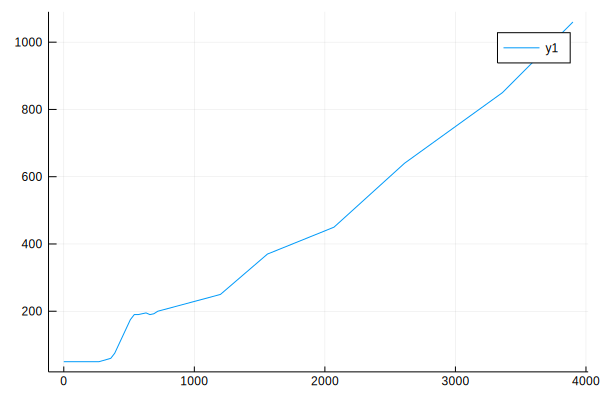

In [21]:
plot(timeLength[:,1], timeLength[:,2])

In [22]:
#make a function to compute distance between a pair of nodes 
function scaledDistance(second, first)
    
    #find the adult distance
    a = labelsTimesPositionsType[first,3]
    b = labelsTimesPositionsType[first,4]
    c = labelsTimesPositionsType[second,3]
    d = labelsTimesPositionsType[second,4]
    adultDistance = evaluate(Euclidean(),[a,b], [c,d])
    
    
    #find the scaling factor
    position = 21
    currentTime = labelsTimesPositionsType[second, 2]
    while currentTime < timeLength[position,1]
        position -= 1
    end
    
    scalingNumerator = (((timeLength[position+1,2] - timeLength[position,2])/(timeLength[position+1,1] - timeLength[position,1])) * (currentTime - timeLength[position,1])) + timeLength[position,2]
    scaleFactor = scalingNumerator / 3900
    
    return scaleFactor * adultDistance
end

scaledDistance (generic function with 1 method)

In [36]:
#make numTrials copies of ESTG
numTrials = 1000

trials = zeros(numNodes, numNodes, numTrials)
fill!(trials, 3000)

for k in 1:numTrials
    
    for i in 1:numNodes
        trials[i,i,k] = labelsTimesPositionsType[i, 2]
    end
    
    for i in 2:numNodes
        for j in 1:i-1
            
            prob = (H[j]/Hmax) * ((MathConstants.e)^ (-1 * (scaledDistance(i, j)/delta)))
            if rand() < prob
                trials[i,j,k] = labelsTimesPositionsType[i, 2]
                trials[j,i,k] = labelsTimesPositionsType[i, 2]
            end
        end
    end
    
end

In [37]:
begin
#perform betti computations
trialCurves = pmap(i -> computeBarcodesNullModels(trials[:,:,i], times), 1:numTrials)

        
end

quant = size(times, 1)

#organize this into a nicer format
ESTGBettiCurves = zeros(quant,3,numTrials)

for k in 1:numTrials
    ESTGBettiCurves[:,:,k] = trialCurves[k]
end


edgeDensities = zeros(quant, numTrials)
for k in 1:numTrials
    numberEdges = 0
    
    for i in 2:quant
        for j in 1:i-1
            if trials[i,j,k] < 3000
                numberEdges += 1
            end
        end
        
        edgeDensities[i,k] += (numberEdges/binomial(i,2))
    end
end 
            
    
println("output: ESTGBettiCurves, edgeDensities")

output: ESTGBettiCurves, edgeDensities


In [38]:
#computes average and standard deviation of 1000 copies
bettiMeans = zeros(quant,3)
bettiStd = zeros(quant,3)
averageTimes = zeros(quant)
edgeDensityMeans = zeros(quant,2)

for i in 1:quant
    bettiMeans[i,1] = mean(ESTGBettiCurves[i,1,:])
    bettiMeans[i,2] = mean(ESTGBettiCurves[i,2,:])
    bettiMeans[i,3] = mean(ESTGBettiCurves[i,3,:])
    
    bettiStd[i,1] = std(ESTGBettiCurves[i,1,:])
    bettiStd[i,2] = std(ESTGBettiCurves[i,2,:])
    bettiStd[i,3] = std(ESTGBettiCurves[i,3,:])
        
    edgeDensityMeans[i,1] = mean(edgeDensities[i,:])
    edgeDensityMeans[i,2] = std(edgeDensities[i,:])
end

print("output: bettiMeans, bettiStd, averageTimes, edgeDensityMeans")

#cleanup


output: bettiMeans, bettiStd, averageTimes, edgeDensityMeans

In [39]:
#determine edge density with time
edgeDensity = zeros(279)
numberEdges = 0

for i in 1:279
    for j in 1:i-1
        if birthSortedAdjacencyMatrix[i,j] < 3000
            numberEdges += 1
        end
    end
    edgeDensity[i] = numberEdges/binomial(i,2)
end

In [46]:
#plots the average of the random curves, which a strip covering +/- 1 std


p1 = plot(times[:,1], bettiMeans[:,2:3], ribbon = bettiStd[:,2:3], color = [:red :blue theme(:default)], legend=:bottomright , title = "ESTG", label = ["dim 1", "dim 2"],  xlabel = "time", ylabel = "betti number")
plot!(times[:,1], BettiCurves[:,2:3], line=(:dot,2), color = [:red :blue theme(:default)], label = [ "original dim 1" "original dim 2"])
p2 = plot(times[:,1], bettiMeans[:,1], ribbon = bettiStd[:,1], color = [:green theme(:default)], legend=:bottomright , title = "ESTG", label = ["dim 0"],  xlabel = "time", ylabel = "betti number", ylims = (0,10))
plot!(times[:,1], BettiCurves[:,1], line=(:dot,2), label = "original dim 0", color = [:green theme(:default)])
#p3 = plot(times[:,1], edgeDensityMeans[:,1], color = [:gray], ribbon = edgeDensityMeans[:,2], line=(:dot,2),  ylabel = "edge density")
#plot!(labelsTimesPositionsType[:,1], edgeDensity[:], lc = [:grey], line=(:dot,2))


plot(p1,p2,layout = (2,1), size = (800,800))

savefig("ESTG.pdf")

In [ ]:
#beginning of topological similarity analysis

In [68]:
#computes zeroth dimensional topological similarity
@everywhere function zeroDimTopSim(matrix)
#hold barcodes for topological similarity calculation  
eireneGraph = eirene(matrix[:,:], minrad = 0.5, maxrad = 3001, maxdim = 0)

zeroDimBarcodes = barcode(eireneGraph, dim = 0)
originalBarcodes = zeros(size(zeroDimBarcodes)[1],3)


#stores the information for the non-reordered matrix
if size(zeroDimBarcodes)[1] > 0
    for i in 1:size(zeroDimBarcodes)[1]
        originalBarcodes[i,1] = 0
        originalBarcodes[i,2] = zeroDimBarcodes[i,1]
        originalBarcodes[i,3] = zeroDimBarcodes[i,2]
    end
end



#construct indicies for upcoming map
indicies = Array{Any, 1}(undef, 38781)
counter = 0
for i in 2:279
    for j in 1:i-1
        counter += 1
        indicies[counter] = [i,j]
    end
end



#compute topological similarity for this graph
zeroDimensionalBND = zeros(279,279)
begin
storage = pmap(x -> rcopy(R"bottleneck($originalBarcodes, $(reorderability(matrix[:,:], x[1], x[2], originalBarcodes, labelsTimesPositionsType[:,2], 0)), dimension = 0)") , indicies)
end

storageCounter = 0
for i in 2:279
    for j in 1:i-1
        storageCounter += 1
        zeroDimensionalBND[i,j] = storage[storageCounter]
    end
end

zeroDimemsionalTopologicalSimilarity = zeros(279,279)
for i in 2:279
    for j in 1:i-1
        if labelsTimesPositionsType[i,2] != labelsTimesPositionsType[j,2]
            zeroDimemsionalTopologicalSimilarity[i,j] = 1 - (zeroDimensionalBND[i,j] / (labelsTimesPositionsType[i,2] - labelsTimesPositionsType[j,2]))
        else
            zeroDimemsionalTopologicalSimilarity[i,j] = 1
        end
    end
end


return zeroDimemsionalTopologicalSimilarity
end

In [ ]:
begin
#perform betti computations
trialSims = pmap(i -> zeroDimTopSim(trials[:,:,i]), 1:numTrials)      
end

print("finished hard part")

#organize this into a nicer format
ESTGtopSimDimZeroTrials = zeros(279,279,numTrials)

for k in 1:numTrials
    ESTGtopSimDimZeroTrials[:,:,k] = trialSims[k]
end
 
#then take the average
ESTGtopSimDimZero = zeros(279,279)

for i in 1:279
    for j in 1:279
        ESTGtopSimDimZero[i,j] = mean(ESTGtopSimDimZeroTrials[i,j,:])
    end
end
    
println("output: ESTGtopSimDimZero")

In [ ]:
#computes first dimensional topological similarity
@everywhere function oneDimTopSim(matrix)
#hold barcodes for topological similarity calculation  
eireneGraph = eirene(matrix[:,:], minrad = 0.5, maxrad = 3001, maxdim = 1)

oneDimBarcodes = barcode(eireneGraph, dim = 1)
originalBarcodes = zeros(size(oneDimBarcodes)[1],3)


#stores the information for the non-reordered matrix
if size(oneDimBarcodes)[1] > 0
    for i in 1:size(oneDimBarcodes)[1]
        originalBarcodes[i,1] = 1
        originalBarcodes[i,2] = oneDimBarcodes[i,1]
        originalBarcodes[i,3] = oneDimBarcodes[i,2]
    end
end



#construct indicies for upcoming map
indicies = Array{Any, 1}(undef, 38781)
counter = 0
for i in 2:279
    for j in 1:i-1
        counter += 1
        indicies[counter] = [i,j]
    end
end



#compute topological similarity for this graph
oneDimensionalBND = zeros(279,279)
begin
storage = pmap(x -> rcopy(R"bottleneck($originalBarcodes, $(reorderability(matrix[:,:], x[1], x[2], originalBarcodes, labelsTimesPositionsType[:,2],1)), dimension = 1)") , indicies)
end

storageCounter = 0
for i in 2:279
    for j in 1:i-1
        storageCounter += 1
        oneDimensionalBND[i,j] = storage[storageCounter]
    end
end

oneDimemsionalTopologicalSimilarity = zeros(279,279)
for i in 2:279
    for j in 1:i-1
        if labelsTimesPositionsType[i,2] != labelsTimesPositionsType[j,2]
            oneDimemsionalTopologicalSimilarity[i,j] = 1 - (oneDimensionalBND[i,j] / (labelsTimesPositionsType[i,2] - labelsTimesPositionsType[j,2]))
        end
    end
end

return oneDimemsionalTopologicalSimilarity
end

In [ ]:
begin
#perform betti computations
trialSims = pmap(i -> oneDimTopSim(trials[:,:,i]), 1:numTrials)      
end
    
#organize this into a nicer format
ESTGtopSimDimOneTrials = zeros(279,279,numTrials)

for k in 1:numTrials
    ESTGtopSimDimOneTrials[:,:,k] = trialSims[k]
end
 
#then take the average
ESTGtopSimDimOne = zeros(279,279)

for i in 1:279
    for j in 1:279
        ESTGtopSimDimOne[i,j] = mean(ESTGtopSimDimOneTrials[i,j,:])
    end
end
    
println("output: ESTGtopSimDimOne")

In [ ]:
#computes second dimensional topological similarity
@everywhere function twoDimTopSim(matrix)

#hold barcodes for topological similarity calculation  
eireneGraph = eirene(matrix[:,:], minrad = 0.5, maxrad = 3001, maxdim = 2)

twoDimBarcodes = barcode(eireneGraph, dim = 2)
originalBarcodes = zeros(size(twoDimBarcodes)[1],3)


#stores the information for the non-reordered matrix
if size(twoDimBarcodes)[1] > 0
    for i in 1:size(twoDimBarcodes)[1]
        originalBarcodes[i,1] = 2
        originalBarcodes[i,2] = twoDimBarcodes[i,1]
        originalBarcodes[i,3] = twoDimBarcodes[i,2]
    end
end



#construct indicies for upcoming map
indicies = Array{Any, 1}(undef, 38781)
counter = 0
for i in 2:279
    for j in 1:i-1
        counter += 1
        indicies[counter] = [i,j]
    end
end



#compute topological similarity for this graph
twoDimensionalBND = zeros(279,279)
begin
storage = pmap(x -> rcopy(R"bottleneck($originalBarcodes, $(reorderability(matrix[:,:], x[1], x[2], originalBarcodes, labelsTimesPositionsType[:,2],2)), dimension = 2)") , indicies)
end

storageCounter = 0
for i in 2:279
    for j in 1:i-1
        storageCounter += 1
        twoDimensionalBND[i,j] = storage[storageCounter]
    end
end

twoDimemsionalTopologicalSimilarity = zeros(279,279)
for i in 2:279
    for j in 1:i-1
        if labelsTimesPositionsType[i,2] != labelsTimesPositionsType[j,2]
            twoDimemsionalTopologicalSimilarity[i,j] = 1 - (twoDimensionalBND[i,j] / (labelsTimesPositionsType[i,2] - labelsTimesPositionsType[j,2]))
        end
    end
end


return twoDimemsionalTopologicalSimilarity
end

In [ ]:
begin
#perform betti computations
trialSims = pmap(i -> twoDimTopSim(trials[:,:,i]), 1:numTrials)      
end
    
#organize this into a nicer format
ESTGtopSimDimTwoTrials = zeros(279,279,numTrials)

for k in 1:numTrials
    ESTGtopSimDimTwoTrials[:,:,k] = trialSims[k]
end
 
#then take the average
ESTGtopSimDimTwo = zeros(279,279)

for i in 1:279
    for j in 1:279
        ESTGtopSimDimTwo[i,j] = mean(ESTGtopSimDimTwoTrials[i,j,:])
    end
end
    
println("output: ESTGtopSimDimTwo")

In [ ]:
#compute average similarity across dimensions 1-3
averageTopologicalSimilarity = zeroDimemsionalTopologicalSimilarity[:,:]/3 + oneDimemsionalTopologicalSimilarity[:,:]/3 + twoDimemsionalTopologicalSimilarity[:,:]/3
averageBND = zeroDimensionalBND[:,:]/3 + oneDimensionalBND[:,:]/3 + twoDimensionalBND[:,:]/3

println("output: averageTopologicalSimilarity, averageBND")

In [ ]:
#plots topological similarity
p1 = heatmap(zeroDimemsionalTopologicalSimilarity, yflip = true, aspect_ratio=:equal, title = "Dimension Zero Topological Similarity", color = :tempo)
p2 = heatmap(zeroDimensionalBND, yflip = true, aspect_ratio=:equal, title = "Dimension Zero Bottleneck Distance", color = :grays)
plot(p1, p2, layout = (1,2))
#savefig("dimensionZeroSimilarity.pdf")

In [ ]:
#plots topological similarity
p1 = heatmap(oneDimemsionalTopologicalSimilarity, yflip = true, aspect_ratio=:equal, title = "Dimension One Topological Similarity", color = :tempo)
p2 = heatmap(oneDimensionalBND, yflip = true, aspect_ratio=:equal, title = "Dimension One Bottleneck Distance", color = :grays)
plot(p1, p2, layout = (1,2))
#savefig("dimensionOneSimilarity.pdf")

In [ ]:
#plots topological similarity
p1 = heatmap(twoDimemsionalTopologicalSimilarity, yflip = true, aspect_ratio=:equal, title = "Dimension Two Topological Similarity", color = :tempo)
p2 = heatmap(twoDimensionalBND, yflip = true, aspect_ratio=:equal, title = "Dimension Two Bottleneck Distance", color = :grays)
plot(p1, p2, layout = (1,2))
#savefig("dimensionTwoSimilarity.pdf")

In [ ]:
#plots topological similarity
p1 = heatmap(twoDimemsionalTopologicalSimilarity, yflip = true, aspect_ratio=:equal, title = "Dimension Two Topological Similarity", color = :tempo)
p2 = heatmap(twoDimensionalBND, yflip = true, aspect_ratio=:equal, title = "Dimension Two Bottleneck Distance", color = :grays)
plot(p1, p2, layout = (1,2))
#savefig("averageSimilarity.pdf")

In [ ]:
#test on reorderability between types

#variables for connections within a type
intraSensorySimilarities = zeros(3570) #85 sensory neurons
intraMotorSimilarities = zeros(6555) #115 motor neurons
intraInterSimilarities = zeros(3081) # 79 inter neurons
intraSensoryCounter = 1
intraMotorCounter = 1
intraInterCounter = 1


#variables for connections between different types and a fixed type
interSensorySimilarities = zeros(16490) 
interMotorSimilarities = zeros(18860) 
interInterSimilarities = zeros(15800)
interSensoryCounter = 1
interMotorCounter = 1
interInterCounter = 1

#variables for general within types connections
intraTypeSimilariteis = zeros(13206)
intraCounter = 1

#variabels for general between types connections
interTypeSimilariteis = zeros(25575)
interCounter = 1





#loads all the various arrays
for i in 2:279
    for j in 1:i-1
        
        #see if the connection is intra-type
        if labelsTimesPositionsType[i,5] == labelsTimesPositionsType[j,5]
            
            #determine which type the connection is, add the similarity to the list, and up the ticker
            if labelsTimesPositionsType[i,5] == "sensory"
                intraSensorySimilarities[intraSensoryCounter] = topologicalSimilarity[i,j]
                intraSensoryCounter += 1
            end
            
            if labelsTimesPositionsType[i,5] == "motor"
                intraMotorSimilarities[intraMotorCounter] = topologicalSimilarity[i,j]
                intraMotorCounter += 1
            end
            
            if labelsTimesPositionsType[i,5] == "inter"
                intraInterSimilarities[intraInterCounter] = topologicalSimilarity[i,j]
                intraInterCounter += 1
            end
            
            intraTypeSimilariteis[intraCounter]  = topologicalSimilarity[i,j]
            intraCounter += 1
            
        end
        
        #otherwise the connection is a general InterType
        if labelsTimesPositionsType[i,5] != labelsTimesPositionsType[j,5]
            
            #determine which types the connection is between, add the similarity to the lists, and up the tickers
            if labelsTimesPositionsType[i,5] == "sensory" || labelsTimesPositionsType[j,5] == "sensory"
                interSensorySimilarities[interSensoryCounter] = topologicalSimilarity[i,j]
                interSensoryCounter += 1
            end
            
            if labelsTimesPositionsType[i,5] == "motor" || labelsTimesPositionsType[j,5] == "motor"
                interMotorSimilarities[interMotorCounter] = topologicalSimilarity[i,j]
                interMotorCounter += 1
            end
            
            if labelsTimesPositionsType[i,5] == "inter" || labelsTimesPositionsType[j,5] == "inter"
                interInterSimilarities[interInterCounter] = topologicalSimilarity[i,j]
                interInterCounter += 1
            end
                      
            interTypeSimilariteis[interCounter] = topologicalSimilarity[i,j]
            interCounter += 1
        end
    end
end

println("many outputs")

In [ ]:
#do test of signifigance for each intra vs inter sensory pair
MannWhitneyUTest(intraSensorySimilarities, interSensorySimilarities)

In [ ]:
#do test of signifigance for each intra vs inter motor pair
MannWhitneyUTest(intraMotorSimilarities, interMotorSimilarities)

In [ ]:
#do test of signifigance for each intra vs inter inter pair
MannWhitneyUTest(intraInterSimilarities, interInterSimilarities)

In [ ]:
#do test of signifigance for each intra-inter pair
MannWhitneyUTest(intraTypeSimilariteis, interTypeSimilariteis)

In [ ]:
plotArray = Array{Any,1}(UndefInitializer(), 8)
plotArray[1] = interMotorSimilarities[:]
plotArray[2] = intraMotorSimilarities[:]
plotArray[3] = interSensorySimilarities[:]
plotArray[4] = intraSensorySimilarities[:]
plotArray[5] = interInterSimilarities[:]
plotArray[6] = intraInterSimilarities[:]
plotArray[7] = interTypeSimilariteis[:]
plotArray[8] = intraTypeSimilariteis[:]

violin(["inter-Motor" "intra-Motor" "inter-Sensory" "intra-Sensory" "inter-Inter" "intra-Inter" "inter-Type" "inter-Type"],plotArray,leg=false, color = theme(:dark))
boxplot!(["inter-Motor" "intra-Motor" "inter-Sensory" "intra-Sensory" "inter-Inter" "intra-Inter" "inter-Type" "inter-Type"],plotArray,leg=false, color = theme(:dark))

In [ ]:
#store an array of all 92 indices of L-R pairs
LRindices = zeros(92,2)
counter = 0

for i in 1:279
    if (labelsTimesPositionsType[i,1])[end] == 'L' && labelsTimesPositionsType[i,1] != "AVL"
        counter += 1
        LRindices[counter, 1] = i
        
        rIndex = 0
        while LRindices[counter,2] == 0
            rIndex += 1
            
            if (labelsTimesPositionsType[rIndex, 1])[end] == 'R' && (labelsTimesPositionsType[rIndex, 1])[1:end-1] == (labelsTimesPositionsType[i,1])[1:end-1]
                LRindices[counter,2] = rIndex
            end
        end
    end
end

println("output: LRindices")

In [ ]:
#store the topological similarities between LR pairs and otherwise
topSimsBetweenLR = zeros(92)
topSimsOutsideLR = zeros(38689) #279C2 - 92
intraCounter = 0
interCounter = 0

for i in 2:279
    for j in 1:i-1
        
        paired = false
        
        #determines if i-j is a L-R pair
        for k in 1:92
            if (LRindices[k,1] == i && LRindices[k,2] == j) || (LRindices[k,2] == i && LRindices[k,1] == j)
                paired = true
            end
        end
        
        #stores the similarity between i and j in the corresponding list
        if paired
            intraCounter += 1
            topSimsBetweenLR[intraCounter] = topologicalSimilarity[i,j]
        end
        
        if !paired
            interCounter += 1
            topSimsOutsideLR[interCounter] = topologicalSimilarity[i,j]
        end
    end
end

println("output: topSimsBetweenLR and topSimsOutsideLR")

In [ ]:
#plots topological similarity for L-R and non L-R pairs
plotArray = Array{Any,1}(UndefInitializer(), 2)
plotArray[1] = topSimsBetweenLR[:]
plotArray[2] = topSimsOutsideLR[:]



violin(["L-R Pair" "Non L-R Pair" ],plotArray,leg=false, color = theme(:dark), title = "topological similarity")
boxplot!(["L-R Pair" "Non L-R Pair"],plotArray,leg=false, color = theme(:dark), title = "topological similarity")

In [ ]:
#do test of signifigance for difference within/out LR pairs
MannWhitneyUTest(topSimsBetweenLR, topSimsOutsideLR)

In [ ]:
#store array of LR similarity that only takes in head, body, tail, pre, and post
withinHead = zeros(74)
withinBody = zeros(7)
withinTail = zeros(11)
withinPre = zeros(82)
withinPost = zeros(10)

withoutHead = zeros(16514)
withoutBody = zeros(17590)
withoutTail = zeros(4585)
withoutPre = zeros(20018)
withoutPost = zeros(18671)


withinHeadCounter = 0
withinBodyCounter = 0
withinTailCounter = 0
withinPreCounter = 0
withinPostCounter = 0

withoutHeadCounter = 0
withoutBodyCounter = 0
withoutTailCounter = 0
withoutPreCounter = 0
withoutPostCounter = 0

for i in 2:279
    for j in 1:i-1
        
        #determine if i-j is a L-R pair
        paired = false
        for k in 1:92
            if (LRindices[k,1] == i && LRindices[k,2] == j) || (LRindices[k,2] == i && LRindices[k,1] == j)
                paired = true
            end
        end
        
        if paired
            #perform the pre-post storage
            if i < 202
                withinPreCounter += 1
                withinPre[withinPreCounter] = topologicalSimilarity[i,j]
            end
            if i > 201
                 withinPostCounter += 1
                 withinPost[withinPostCounter] = topologicalSimilarity[i,j]
            end
            
            #perform region storage
            if labelsTimesPositionsType[i,3] < 0
                withinHeadCounter += 1
                withinHead[withinHeadCounter] = topologicalSimilarity[i,j]
            end
            
            if labelsTimesPositionsType[i,3] > 0 && labelsTimesPositionsType[i,3] < 0.935
                withinBodyCounter += 1
                withinBody[withinBodyCounter] = topologicalSimilarity[i,j]
            end
            
            if labelsTimesPositionsType[i,3] > 0.935
                withinTailCounter += 1
                withinTail[withinTailCounter] = topologicalSimilarity[i,j]
            end
        end
        
        if !paired
            #perform the pre-post storage
            if i < 202
                withoutPreCounter += 1
                withoutPre[withoutPreCounter] = topologicalSimilarity[i,j]
            end
            if i > 201
                 withoutPostCounter += 1
                 withoutPost[withoutPostCounter] = topologicalSimilarity[i,j]
            end
            
            #perform region storage
            if labelsTimesPositionsType[i,3] < 0
                withoutHeadCounter += 1
                withoutHead[withoutHeadCounter] = topologicalSimilarity[i,j]
            end
            
            if labelsTimesPositionsType[i,3] > 0 && labelsTimesPositionsType[i,3] < 0.935
                withoutBodyCounter += 1
                withoutBody[withoutBodyCounter] = topologicalSimilarity[i,j]
            end
            
            if labelsTimesPositionsType[i,3] > 0.935
                withoutTailCounter += 1
                withoutTail[withoutTailCounter] = topologicalSimilarity[i,j]
            end
        end
    end
end

println("output: many")

In [ ]:
#plots L-R similarity parsed by location
plotArray = Array{Any,1}(UndefInitializer(), 6)
plotArray[1] = withinHead[:]
plotArray[2] = withoutHead[:]
plotArray[3] = withinBody[:]
plotArray[4] = withoutBody[:]
plotArray[5] = withinTail[:]
plotArray[6] = withoutTail[:]


violin(["Head pair" "Head non-pair" "Body pair" "Body non-pair" "Tail pair" "Tail non-pair"],plotArray,leg=false, color = theme(:dark), title = "LR similarity by location")
boxplot!(["Head pair" "Head non-pair" "Body pair" "Body non-pair" "Tail pair" "Tail non-pair"],plotArray,leg=false, color = theme(:dark), title = "LR similarity by location")

In [ ]:
#plots L-R similarity parsed by time
plotArray = Array{Any,1}(UndefInitializer(), 4)
plotArray[1] = withinPre[:]
plotArray[2] = withoutPre[:]
plotArray[3] = withinPost[:]
plotArray[4] = withoutPost[:]



violin(["Pre pair" "Pre non-pair" "Post pair" "Post non-pair"],plotArray,leg=false, color = theme(:dark), title = "LR similarity by time")
boxplot!(["Pre pair" "Pre non-pair" "Post pair" "Post non-pair"],plotArray,leg=false, color = theme(:dark), title = "LR similarity by time")

In [ ]:
#compute topological overlap of all LR and non-LR pairs
topologicalOverlapWithin = zeros(92)
topologicalOverlapWithout = zeros(38689)
withinCounter = 0
withoutCounter = 0

for i in 2:279
    for j in 1:i-1
        #generate and clear variables
        iNeighbors = zeros(279)
        jNeighbors = zeros(279)
        sharedNeighbors = 0
        numerator = 0
        denominator = 0
        topologicalOverlap = 0
        
        #determine the topological overlap
        for k in 1:279
            if birthSortedAdjacencyMatrix[i,k] < 300
                iNeighbors[k] = 1
            end
            if birthSortedAdjacencyMatrix[j,k] < 300
                jNeighbors[k] = 1
            end
        end
        
        for k in 1:279
            if iNeighbors[k] == 1 && jNeighbors[k] == 1
                sharedNeighbors += 1
            end
        end
        
        numerator = sharedNeighbors
        if iNeighbors[j] == 1
            numerator += 1
        end
        
        denominator = minimum([sum(iNeighbors[:]), sum(jNeighbors[:])]) + 1
        if iNeighbors[j] == 1
            denominator -= 1
        end
        
        topologicalOverlap = numerator/denominator
        
        
        #now store the topological overlap in the correct bin
        paired = false
        for k in 1:92
            if (LRindices[k,1] == i && LRindices[k,2] == j) || (LRindices[k,2] == i && LRindices[k,1] == j)
                paired = true
            end
        end
        
        if paired
            withinCounter += 1
            topologicalOverlapWithin[withinCounter] = topologicalOverlap       
        end
        
        if !paired
            withoutCounter += 1
            topologicalOverlapWithout[withoutCounter] = topologicalOverlap 
        end
    end
end

println("output: topologicalOverlapWithin and topologicalOverlapWithout")

In [ ]:
#plot the topological overlaps
plotArray = Array{Any,1}(UndefInitializer(), 2)
plotArray[1] = topologicalOverlapWithin[:]
plotArray[2] = topologicalOverlapWithout[:]



violin(["between L-R Pair" "Non L-R Pair" ],plotArray,leg=false, color = theme(:dark), title = "topological overlap")
boxplot!(["between L-R Pair" "Non L-R Pair"],plotArray,leg=false, color = theme(:dark), title = "topological overlap")

In [ ]:
#do test of signifigance for difference within/out LR pairs
MannWhitneyUTest(topologicalOverlapWithin, topologicalOverlapWithout)

In [ ]:
#store matrix of topopogical similarity vs distance
#column 2 is distance, column 1 is similarity
pairsWithTopSimandDistance = zeros(38781,2)
counter = 1

for i in 2:279
    for j in 1:i-1
        pairsWithTopSimandDistance[counter,2] = sqrt( (labelsTimesPositionsType[i,3] - labelsTimesPositionsType[j,3])^2 + (labelsTimesPositionsType[i,4] - labelsTimesPositionsType[j,4])^2 )
        pairsWithTopSimandDistance[counter,1] = topologicalSimilarity[i,j]
        counter += 1
    end
end

#sorts the matrix by distance
for i in 1:38781
    movement = 0
    
    while i - movement > 1 && pairsWithTopSimandDistance[i - movement, 2] < pairsWithTopSimandDistance[i-movement - 1, 2]
        shadowCache = pairsWithTopSimandDistance[i - movement, :]
        pairsWithTopSimandDistance[i - movement, :] = pairsWithTopSimandDistance[i - movement - 1, :]
        pairsWithTopSimandDistance[i - movement - 1, :] = shadowCache
        
        movement += 1
    end
end
println("output: pairsWithTopSimandDistance")

In [ ]:
#compute correlation between distance and topological similarity
cor(pairsWithTopSimandDistance[:,1], pairsWithTopSimandDistance[:,2])

In [ ]:
#try to categorize unfriendly nodes by adjacent location on matrix deltas
topologicalSimilarityDeltas  = zeros(279,276) #nnodes x ndeltas size
reductThisIntoThat = zeros(279,278)

#iterates over the nodes
for i in 1:279
    adjustment = 0
    
    #iterate over all pairs of nodes including i
    for j in 1:278
           
        #to avoid having to 'switch directions,' take the max of the symmetric pair
        first = maximum([topologicalSimilarity[i,j], topologicalSimilarity[j,i]])
        second = maximum([topologicalSimilarity[i,j+1], topologicalSimilarity[j+1,i]])
        delta = abs(first - second)
        reductThisIntoThat[i,j] = delta
        
    end
end

#remove deltas in which (i,i) contributed
for i in 2:278
    counter = 0
    
    for j in 1:278
        if j < i - 1
            counter += 1
            topologicalSimilarityDeltas[i,counter] = reductThisIntoThat[i,j]
        end
        
        if j > i 
            counter += 1
            topologicalSimilarityDeltas[i,counter] = reductThisIntoThat[i,j]
        end
        
    end
end

#the above construction is problematic for nodes 1 and 279, so we store them in a separate matrix
for k in 1:276
    topologicalSimilarityDeltas[1,k] = reductThisIntoThat[1,k+1]
    topologicalSimilarityDeltas[279,k] = reductThisIntoThat[279,k]
end


println("output: topologicalSimilarityDeltas and deltasForExtrema")

In [ ]:
#compute variance and mean for each node's set of deltas
nodeDeltaMeanAndVaraince = zeros(279,2)

for i in 1:279
    nodeDeltaMeanAndVaraince[i,1] = mean(topologicalSimilarityDeltas[i,:])
    nodeDeltaMeanAndVaraince[i,2] = var(topologicalSimilarityDeltas[i,:])
end

println("output: nodeDeltaMeanAndVaraince")

In [ ]:
#plots delta mean and delta varaince
plotArray = Array{Any,1}(UndefInitializer(), 2)
plotArray[1] = nodeDeltaMeanAndVaraince[:,1]
plotArray[2] = nodeDeltaMeanAndVaraince[:,2]



violin(["Delta Mean" "Delta Variance" ],plotArray,leg=false, color = theme(:dark))
boxplot!(["Delta Mean" "Delta Variance"],plotArray,leg=false, color = theme(:dark))


In [ ]:
#plot distance/similarity pairs
scatter(nodeDeltaMeanAndVaraince[:,1], nodeDeltaMeanAndVaraince[:,2], legend = false, title = "Delta Mean vs Delta Variance", xlabel = "delta mean", ylabel = "delta variance", color = :grey)

In [ ]:
#compute correlation between distance and topological similarity
cor(nodeDeltaMeanAndVaraince[:,1], nodeDeltaMeanAndVaraince[:,2])

In [ ]:
newTopSim = topologicalSimilarity[:,:]
newDeltaMean = nodeDeltaMeanAndVaraince[:,2]

for i in 1:279
    movement = 0
    
    while i - movement > 1 && newDeltaMean[i - movement] < newDeltaMean[i-movement - 1]
        shadowCache = newDeltaMean[i - movement]
        newDeltaMean[i - movement] = newDeltaMean[i - movement - 1]
        newDeltaMean[i - movement - 1] = shadowCache
        
        shadowCache = newTopSim[i - movement, :]
        newTopSim[i - movement, :] = newTopSim[i - movement - 1, :]
        newTopSim[i - movement - 1, :] = shadowCache
        
        shadowCache = newTopSim[:, i - movement]
        newTopSim[:, i - movement] = newTopSim[:, i - movement - 1]
        newTopSim[:, i - movement - 1] = shadowCache
        
        movement += 1
    end
end

for i in 2:279
    for j in 1:i-1
        if newTopSim[j,i] > 0
            newTopSim[i,j] = newTopSim[j,i]
            newTopSim[j,i] = 0
        end
    end
end

In [ ]:
#plots topological similarity
heatmap(newTopSim, yflip = false, aspect_ratio=:equal, title = "One-Two Dimensional Topological Similarity", color = :tempo)

In [ ]:
newDeltaMean

In [ ]:
#do summed similarity calculations
summedSimilarity = zeros(279)

for i in 1:279
    summedSimilarity[i] = sum(topologicalSimilarity[i,:]) + sum(topologicalSimilarity[:,i])
end


In [ ]:
#plots delta mean and delta varaince
plotArray = Array{Any,1}(UndefInitializer(), 1)
plotArray[1] = summedSimilarity



violin(["Summed Similarity" ],plotArray,leg=false, color = theme(:dark))
boxplot!(["Summed Similarity"],plotArray,leg=false, color = theme(:dark))


In [ ]:
newTopSim = topologicalSimilarity[:,:]
newDeltaMean = summedSimilarity[:]

for i in 1:279
    movement = 0
    
    while i - movement > 1 && newDeltaMean[i - movement] < newDeltaMean[i-movement - 1]
        shadowCache = newDeltaMean[i - movement]
        newDeltaMean[i - movement] = newDeltaMean[i - movement - 1]
        newDeltaMean[i - movement - 1] = shadowCache
        
        shadowCache = newTopSim[i - movement, :]
        newTopSim[i - movement, :] = newTopSim[i - movement - 1, :]
        newTopSim[i - movement - 1, :] = shadowCache
        
        shadowCache = newTopSim[:, i - movement]
        newTopSim[:, i - movement] = newTopSim[:, i - movement - 1]
        newTopSim[:, i - movement - 1] = shadowCache
        
        movement += 1
    end
end

for i in 2:279
    for j in 1:i-1
        if newTopSim[j,i] > 0
            newTopSim[i,j] = newTopSim[j,i]
            newTopSim[j,i] = 0
        end
    end
end

In [ ]:
#plots topological similarity
heatmap(newTopSim, yflip = false, aspect_ratio=:equal, title = "One-Two Dimensional Topological Similarity", color = :tempo)